# Giới thiệu bài toán

**Mục tiêu**

Tìm hiểu và tiền xử lý dữ liệu hoa bằng hồi quy và phương pháp phân tích thành phần chính (PCA).

Thực hành trên file số liệu iris_mv.csv.


# 1. Khai báo thư viện

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# 2. Đọc và tìm hiểu về  dữ liệu

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/CThongke/')

Mounted at /content/drive/


In [ ]:
%cd "D:\thống kê nâng cao\baitap_nhom"

[Errno 2] No such file or directory: 'D:\\thống kê nâng cao\\baitap_nhom'
/content


In [ ]:
data = pd.read_csv("iris_mv.csv",)
data.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,NaN,NaN,0.2,setosa
1,2,4.9,3.0,NaN,0.2,setosa


In [ ]:
data = data.drop(columns= ["Unnamed: 0"]) #xóa đi cột thừa
data.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## Phân tích nguyên nhân

In [ ]:
pd.DataFrame({"Tần số dữ liệu mất":data.isnull().sum(),
              "Tần suất dữ liệu mất":data.isnull().sum()/data.shape[0] })

,Tần số dữ liệu mất,Tần suất dữ liệu mất
Sepal.Length,49,0.326667
Sepal.Width,41,0.273333
Petal.Length,38,0.253333
Petal.Width,39,0.260000
Species,0,0.000000


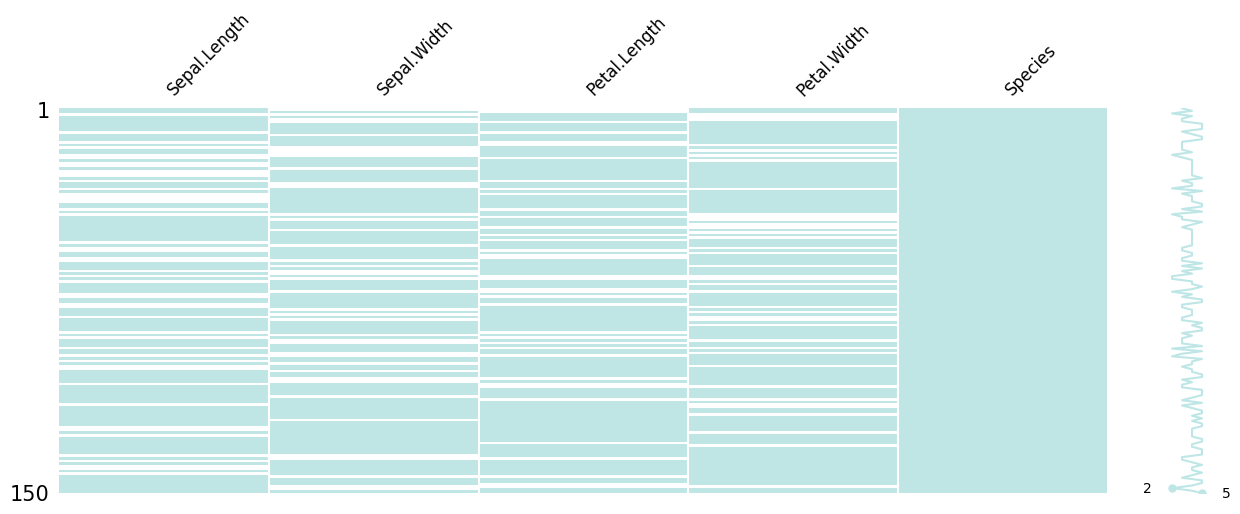

In [ ]:
fig = mno.matrix(data, figsize = (15,5), fontsize=12, color=(0.75, 0.9, 0.9))
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


## Nguyên nhân có khá nhiều dữ liệu bị mất



- Dữ liệu iris là dữ liệu khảo sát: dữ liệu được điều tra từ thực tế bằng dánh sách các câu hỏi nhưng người điền câu hỏi có thể chỉ trả lời 1 vài câu.

- Dữ liệu iris là dữ liệu lâm sàng: những hoa diên vĩ trong quá trình hoàn thành dữ liệu bị mất, chết hoặc chưa được đo 1 vài bộ phận.

- Dữ liệu iris là dữ liệu tổng hợp với mục đích khác, không liên quan đến phân tích thống kê nhưng sau đó lại được khai thác để phân tích thống kê thống kê. Ví dụ người ta tổng hợp hoa iris với mục đích chỉ để xem Petal.Length(cần 1 dữ liệu của hoa iris) có sâu không nên chỉ biết mỗi cột Petal.Length, nhưng sau đó lại được đưa vào bảng thống kê trên (cần 4 dữ liệu ) nên các dữ liệu còn lại sẽ None

In [ ]:
data[data['Sepal.Length'].isnull()].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,NaN,NaN,1.3,NaN,setosa
9,NaN,3.1,NaN,0.1,setosa
13,NaN,3.0,NaN,0.1,setosa
15,NaN,NaN,1.5,0.4,setosa
18,NaN,NaN,1.7,NaN,setosa


- Ngoài ra có thể do lỗi của bên nhập dữ liệu vào file

- Hoặc do dữ liệu nhỏ được liên kết lại thành dữ liệu lớn, các dữ liệu này là 1 nhưng dô tên khác nhau nên chỉ GROUP BY được các cột giống nhau

- Hoặc cố tình tạo ra dữ liệu thiếu - thích hợp với 1 vài mô hình sử dụng biến tiềm ẩn (Latent-variable modeling) hoặc mô hình dự đoán các giá trị thiếu (test để thêm các giá trị mới vào chỗ thiếu rồi so sánh với dữ liệu đủ)

# 3. Các cách bổ sung dữ liệu bằng phương pháp thống kê

In [ ]:
data2 = data.copy()
data2.shape
data2.head()

(150, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,NaN,NaN,1.3,NaN,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa


In [ ]:
data2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,NaN,NaN,1.3,NaN,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,NaN,1.9,virginica
147,6.5,NaN,NaN,NaN,virginica
148,6.2,NaN,5.4,2.3,virginica


In [ ]:
list_Species = data2.Species.unique()
list_Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
a = data2.loc[data2['Species']==list_Species[0]]
b = data2.loc[data2['Species']==list_Species[1]]
c = data2.loc[data2['Species']==list_Species[2]]
a.head()
a.shape
b.head()
b.shape
c.head()
c.shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,NaN,NaN,1.3,NaN,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa


(50, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,NaN,versicolor
51,6.4,3.2,NaN,1.5,versicolor
52,NaN,3.1,4.9,1.5,versicolor
53,5.5,NaN,4.0,1.3,versicolor
54,NaN,2.8,4.6,NaN,versicolor


(50, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,NaN,3.3,6.0,NaN,virginica
101,NaN,2.7,5.1,1.9,virginica
102,7.1,NaN,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


(50, 5)

**Xử lý dữ liệu theo từng giá trị của Species**

In [ ]:

a_mean = [np.round(a['Sepal.Length'].mean(),2) ,np.round(a['Sepal.Width'].mean(),2),
           np.round(a['Petal.Length'].mean(),2) ,np.round(a['Petal.Width'].mean(),2)]
a_median = [a['Sepal.Length'].median(),a['Sepal.Width'].median(),
          a['Petal.Length'].median(),a['Petal.Width'].median()]
a_mean
a_median

[4.98, 3.41, 1.48, 0.23]

[5.0, 3.4, 1.5, 0.2]

In [ ]:
b_mean = [np.round(b['Sepal.Length'].mean(),2) ,np.round(b['Sepal.Width'].mean(),2),
           np.round(b['Petal.Length'].mean(),2) ,np.round(b['Petal.Width'].mean(),2)]
b_median = [b['Sepal.Length'].median(),b['Sepal.Width'].median(),
          b['Petal.Length'].median(),b['Petal.Width'].median()]
b_mean
b_median

[5.88, 2.75, 4.24, 1.32]

[5.85, 2.8, 4.2, 1.3]

In [ ]:
c_mean = [np.round(c['Sepal.Length'].mean(),2) ,np.round(c['Sepal.Width'].mean(),2),
           np.round(c['Petal.Length'].mean(),2) ,np.round(c['Petal.Width'].mean(),2)]
c_median = [c['Sepal.Length'].median(),c['Sepal.Width'].median(),
          c['Petal.Length'].median(),c['Petal.Width'].median()]
c_mean
c_median

[6.58, 2.96, 5.51, 2.04]

[6.5, 3.0, 5.5, 2.1]

## Thay bằng giá trị trung bình

In [ ]:
# thay bằng giá trị trung bình
a1 = pd.DataFrame()
a1['Sepal.Length']=a['Sepal.Length'].fillna(a_mean[0])
a1['Sepal.Width']=a['Sepal.Width'].fillna(a_mean[1])
a1['Petal.Length']=a['Petal.Length'].fillna(a_mean[2])
a1['Petal.Width']=a['Petal.Width'].fillna(a_mean[3])
a1.head()
b1 = pd.DataFrame()
b1['Sepal.Length']=b['Sepal.Length'].fillna(b_mean[0])
b1['Sepal.Width']=b['Sepal.Width'].fillna(b_mean[1])
b1['Petal.Length']=b['Petal.Length'].fillna(b_mean[2])
b1['Petal.Width']=b['Petal.Width'].fillna(b_mean[3])
b1.head()
c1 = pd.DataFrame()
c1['Sepal.Length']=c['Sepal.Length'].fillna(c_mean[0])
c1['Sepal.Width']=c['Sepal.Width'].fillna(c_mean[1])
c1['Petal.Length']=c['Petal.Length'].fillna(c_mean[2])
c1['Petal.Width']=c['Petal.Width'].fillna(c_mean[3])
c1.head()

data2_1 = pd.concat([a1,b1,c1])
data2_1.shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.10,3.41,1.48,0.20
1,4.90,3.00,1.48,0.20
2,4.98,3.41,1.30,0.23
3,4.60,3.10,1.50,0.23
4,5.00,3.41,1.40,0.23


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
50,7.00,3.20,4.70,1.32
51,6.40,3.20,4.24,1.50
52,5.88,3.10,4.90,1.50
53,5.50,2.75,4.00,1.30
54,5.88,2.80,4.60,1.32


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
100,6.58,3.30,6.0,2.04
101,6.58,2.70,5.1,1.90
102,7.10,2.96,5.9,2.10
103,6.30,2.90,5.6,1.80
104,6.50,3.00,5.8,2.20


(150, 4)

## Thay bằng giá trị trung vị

In [ ]:
# thay bằng giá trị trung vi
a2 = pd.DataFrame()
a2['Sepal.Length']=a['Sepal.Length'].fillna(a_median[0])
a2['Sepal.Width']=a['Sepal.Width'].fillna(a_median[1])
a2['Petal.Length']=a['Petal.Length'].fillna(a_median[2])
a2['Petal.Width']=a['Petal.Width'].fillna(a_median[3])
a2.head()
b2 = pd.DataFrame()
b2['Sepal.Length']=b['Sepal.Length'].fillna(b_median[0])
b2['Sepal.Width']=b['Sepal.Width'].fillna(b_median[1])
b2['Petal.Length']=b['Petal.Length'].fillna(b_median[2])
b2['Petal.Width']=b['Petal.Width'].fillna(b_median[3])
b2.head()
c2 = pd.DataFrame()
c2['Sepal.Length']=c['Sepal.Length'].fillna(c_median[0])
c2['Sepal.Width']=c['Sepal.Width'].fillna(c_median[1])
c2['Petal.Length']=c['Petal.Length'].fillna(c_median[2])
c2['Petal.Width']=c['Petal.Width'].fillna(c_median[3])
c2.head()
data2_2 = pd.concat([a2,b2,c2])
data2_2.shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.4,1.5,0.2
1,4.9,3.0,1.5,0.2
2,5.0,3.4,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.4,1.4,0.2


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
50,7.00,3.2,4.7,1.3
51,6.40,3.2,4.2,1.5
52,5.85,3.1,4.9,1.5
53,5.50,2.8,4.0,1.3
54,5.85,2.8,4.6,1.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
100,6.5,3.3,6.0,2.1
101,6.5,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2


(150, 4)

In [ ]:
data2.isnull().sum()
data2_1.isnull().sum()
data2_2.isnull().sum()

Sepal.Length    49
Sepal.Width     41
Petal.Length    38
Petal.Width     39
Species          0
dtype: int64

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
dtype: int64

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
dtype: int64

## So sánh

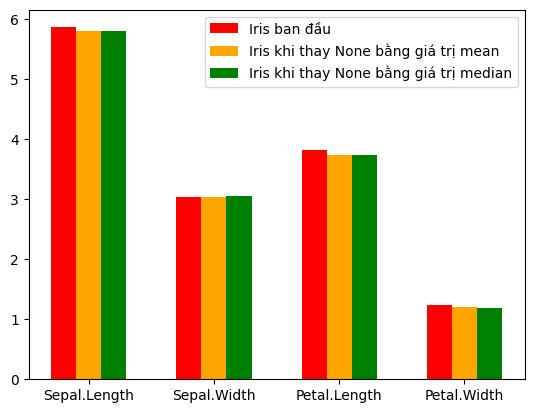

In [ ]:
# so sánh giá trị mean của 3 trường hợp trước thay đổi, sau thay đổi bằng mean và bằng median
properties = np.array(data2.columns.drop("Species"))
properties1 = np.arange(len(properties))

mean_before = data.mean(numeric_only = True).values
mean_fix_mean = data2_1.mean(numeric_only = True).values
mean_fix_median = data2_2.mean(numeric_only = True).values

bar_width = 0.2

fig = plt.bar(properties1 - bar_width, mean_before, color = 'red',width = bar_width, label = 'mean_before')
fig = plt.bar(properties1 , mean_fix_mean, color = 'orange',width = bar_width, label = 'mean_fix_mean')
fig = plt.bar(properties1 + bar_width, mean_fix_median, color = 'green',width = bar_width, label = 'mean_fix_median')

fig = plt.legend(["Iris ban đầu","Iris khi thay None bằng giá trị mean","Iris khi thay None bằng giá trị median"])
fig = plt.xticks(properties1, properties)
plt.show()

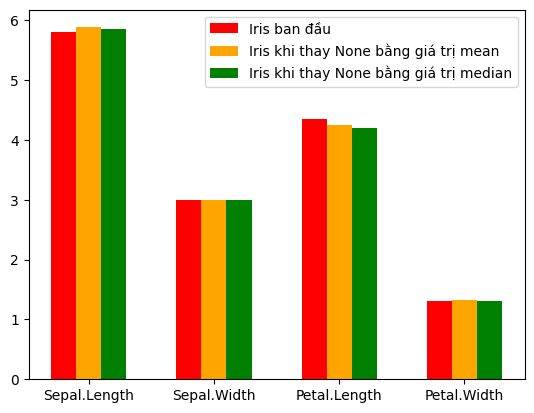

In [ ]:
# so sánh giá trị mean của 3 trường hợp trước thay đổi, sau thay đổi bằng mean và bằng median
properties = np.array(data2.columns.drop("Species"))
properties1 = np.arange(len(properties))

median_before = data.median(numeric_only = True).values
median_fix_mean = data2_1.median(numeric_only = True).values
median_fix_median = data2_2.median(numeric_only = True).values

bar_width = 0.2

fig = plt.bar(properties1 - bar_width, median_before, color = 'red',width = bar_width, label = 'mean_before')
fig = plt.bar(properties1 , median_fix_mean, color = 'orange',width = bar_width, label = 'median_fix_mean')
fig = plt.bar(properties1 + bar_width, median_fix_median, color = 'green',width = bar_width, label = 'median_fix_median')

fig = plt.legend(["Iris ban đầu","Iris khi thay None bằng giá trị mean","Iris khi thay None bằng giá trị median"])
fig = plt.xticks(properties1, properties)
plt.show()

In [ ]:
data2_1['Species'] = data['Species']
data2 = data2_1
data2
data2.isnull().sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.41,1.48,0.20,setosa
1,4.90,3.00,1.48,0.20,setosa
2,4.98,3.41,1.30,0.23,setosa
3,4.60,3.10,1.50,0.23,setosa
4,5.00,3.41,1.40,0.23,setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.51,1.90,virginica
147,6.50,2.96,5.51,2.04,virginica
148,6.20,2.96,5.40,2.30,virginica


Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### Ưu điểm:
- Đơn giản để thực hiện (Mạnh mẽ đối với các trường hợp ngoại lệ)

- Là 1 cách nhanh hơn khi thay các giá trị còn thiếu vào tập dữ liệu

- Mean và median không chênh nhiều

### Nhược điểm:

- Thay đổi phương sai ban đầu

- Nó tác động đến mối tương quan

# 4. Sử dụng phương pháp học máy

## Sử dụng hồi quy tuyến tính

In [ ]:
data3 = data.copy()
data3.shape
data3.head()

(150, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,NaN,NaN,1.3,NaN,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa


In [ ]:
# Lấy ra tên các cột trường có giá trị null
nan_cols = [i for i in data3.columns if data3[i].isnull().any()]
print(nan_cols)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']


In [ ]:
def random_imputation(data3, feature):
    number_missing1 = data3[feature].isnull().sum()
    number_missing = data3[feature].isnull().sum()
    observed_values = data3.loc[data3[feature].notnull(), feature]
    data3.loc[data3[feature].isnull(), feature + '_train'] = np.random.choice(observed_values, number_missing, replace = True)

    return data3

In [ ]:
for feature in nan_cols: # Thêm tập train theo lựa chọn ngẫu nhiên theo từng nhãn Species vào data3
    data3[feature + '_train'] = data3[feature]
    data3.loc[data3['Species']=='setosa'] = random_imputation(data3.loc[data3['Species']=='setosa'], feature)
    data3.loc[data3['Species']=='versicolor']=random_imputation(data3.loc[data3['Species']=='versicolor'], feature)
    data3.loc[data3['Species']=='virginica']=random_imputation(data3.loc[data3['Species']=='virginica'], feature)

In [ ]:
data3

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_train,Sepal.Width_train,Petal.Length_train,Petal.Width_train
0,5.1,NaN,NaN,0.2,setosa,5.1,3.4,1.3,0.2
1,4.9,3.0,NaN,0.2,setosa,4.9,3.0,1.5,0.2
2,NaN,NaN,1.3,NaN,setosa,4.8,4.2,1.3,0.1
3,4.6,3.1,1.5,NaN,setosa,4.6,3.1,1.5,0.2
4,5.0,NaN,1.4,NaN,setosa,5.0,3.4,1.4,0.3
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3
146,6.3,2.5,NaN,1.9,virginica,6.3,2.5,5.6,1.9
147,6.5,NaN,NaN,NaN,virginica,6.5,3.2,6.4,1.8
148,6.2,NaN,5.4,2.3,virginica,6.2,3.0,5.4,2.3


In [ ]:
le = LabelEncoder()
data3['Species_train'] = le.fit_transform(data3.Species)
data3.head()
data3.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_train,Sepal.Width_train,Petal.Length_train,Petal.Width_train,Species_train
0,5.1,NaN,NaN,0.2,setosa,5.1,3.4,1.3,0.2,0
1,4.9,3.0,NaN,0.2,setosa,4.9,3.0,1.5,0.2,0
2,NaN,NaN,1.3,NaN,setosa,4.8,4.2,1.3,0.1,0
3,4.6,3.1,1.5,NaN,setosa,4.6,3.1,1.5,0.2,0
4,5.0,NaN,1.4,NaN,setosa,5.0,3.4,1.4,0.3,0


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_train,Sepal.Width_train,Petal.Length_train,Petal.Width_train,Species_train
145,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3,2
146,6.3,2.5,NaN,1.9,virginica,6.3,2.5,5.6,1.9,2
147,6.5,NaN,NaN,NaN,virginica,6.5,3.2,6.4,1.8,2
148,6.2,NaN,5.4,2.3,virginica,6.2,3.0,5.4,2.3,2
149,5.9,3.0,5.1,1.8,virginica,5.9,3.0,5.1,1.8,2


In [ ]:
new_data3 = pd.DataFrame(columns = [name for name in nan_cols])

for feature in nan_cols: # Tạo mô hình và dự đoán

    new_data3[feature] = data3[feature + "_train"]
    # xác định tên các cột huấn luyện(( xtrain) dùng cho từng dự đoán( ytrain)
    parameters = list(set(data3.columns) - set(nan_cols) - {feature + '_train'}- {'Sepal.Length'}-{'Species'})
    print('xtrain: ',parameters)
    print('ytrain=', feature)
    # Mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X = data3[parameters], y = data3[feature + '_train'])

    new_data3.loc[data3[feature].isnull(), feature] = model.predict(data3[parameters])[data3[feature].isnull()]

    sc= model.score(X = data3[parameters], y = data3[feature + '_train'])
    print("score: ",sc)

xtrain:  ['Petal.Width_train', 'Species_train', 'Petal.Length_train', 'Sepal.Width_train']
ytrain= Sepal.Length


LinearRegression()

score:  0.7420781589788175
xtrain:  ['Petal.Width_train', 'Species_train', 'Petal.Length_train', 'Sepal.Length_train']
ytrain= Sepal.Width


LinearRegression()

score:  0.293455937230352
xtrain:  ['Petal.Width_train', 'Species_train', 'Sepal.Length_train', 'Sepal.Width_train']
ytrain= Petal.Length


LinearRegression()

score:  0.9326729310409756
xtrain:  ['Species_train', 'Petal.Length_train', 'Sepal.Length_train', 'Sepal.Width_train']
ytrain= Petal.Width


LinearRegression()

score:  0.9227204148824267


In [ ]:
new_data3 = new_data3.round(2)
pd.DataFrame(
    [data3['Petal.Length'],
    data3['Petal.Length_train'],
    new_data3['Petal.Length']]
).T

,Petal.Length,Petal.Length_train,Petal.Length
0,NaN,1.3,1.63
1,NaN,1.5,1.68
2,1.3,1.3,1.30
3,1.5,1.5,1.50
4,1.4,1.4,1.40
...,...,...,...
145,5.2,5.2,5.20
146,NaN,5.6,5.61
147,NaN,6.4,5.40
148,5.4,5.4,5.40


In [ ]:
data3_2 = data.copy()
for feature in nan_cols:
    data3_2[feature + '_train'] = data2[feature]
le = LabelEncoder()
data3_2['Species_train'] = le.fit_transform(data3_2.Species)
data3_2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_train,Sepal.Width_train,Petal.Length_train,Petal.Width_train,Species_train
0,5.1,NaN,NaN,0.2,setosa,5.10,3.41,1.48,0.20,0
1,4.9,3.0,NaN,0.2,setosa,4.90,3.00,1.48,0.20,0
2,NaN,NaN,1.3,NaN,setosa,4.98,3.41,1.30,0.23,0
3,4.6,3.1,1.5,NaN,setosa,4.60,3.10,1.50,0.23,0
4,5.0,NaN,1.4,NaN,setosa,5.00,3.41,1.40,0.23,0
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.70,3.00,5.20,2.30,2
146,6.3,2.5,NaN,1.9,virginica,6.30,2.50,5.51,1.90,2
147,6.5,NaN,NaN,NaN,virginica,6.50,2.96,5.51,2.04,2
148,6.2,NaN,5.4,2.3,virginica,6.20,2.96,5.40,2.30,2


In [ ]:
new_data3_2 = pd.DataFrame(columns = [name for name in nan_cols])

for feature in nan_cols:

    new_data3_2[feature] = data3_2[feature + "_train"]
    parameters = list(set(data3_2.columns) - set(nan_cols) - {feature + '_train'}- {'Sepal.Length'}-{'Species'})
    print('xtrain: ',parameters)
    print('ytrain=', feature)
    # Mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X = data3_2[parameters], y = data3_2[feature + '_train'])

    new_data3_2.loc[data3_2[feature].isnull(), feature] = model.predict(data3_2[parameters])[data3_2[feature].isnull()]

    sc= model.score(X = data3_2[parameters], y = data3_2[feature + '_train'])
    print("score: ",sc)

xtrain:  ['Petal.Width_train', 'Species_train', 'Petal.Length_train', 'Sepal.Width_train']
ytrain= Sepal.Length


LinearRegression()

score:  0.8243120663982465
xtrain:  ['Petal.Width_train', 'Species_train', 'Petal.Length_train', 'Sepal.Length_train']
ytrain= Sepal.Width


LinearRegression()

score:  0.3998422371395802
xtrain:  ['Petal.Width_train', 'Species_train', 'Sepal.Length_train', 'Sepal.Width_train']
ytrain= Petal.Length


LinearRegression()

score:  0.9570784068826503
xtrain:  ['Species_train', 'Petal.Length_train', 'Sepal.Length_train', 'Sepal.Width_train']
ytrain= Petal.Width


LinearRegression()

score:  0.9557052744045946


In [ ]:
new_data3_2['Species'] = data['Species']
data3 = new_data3_2


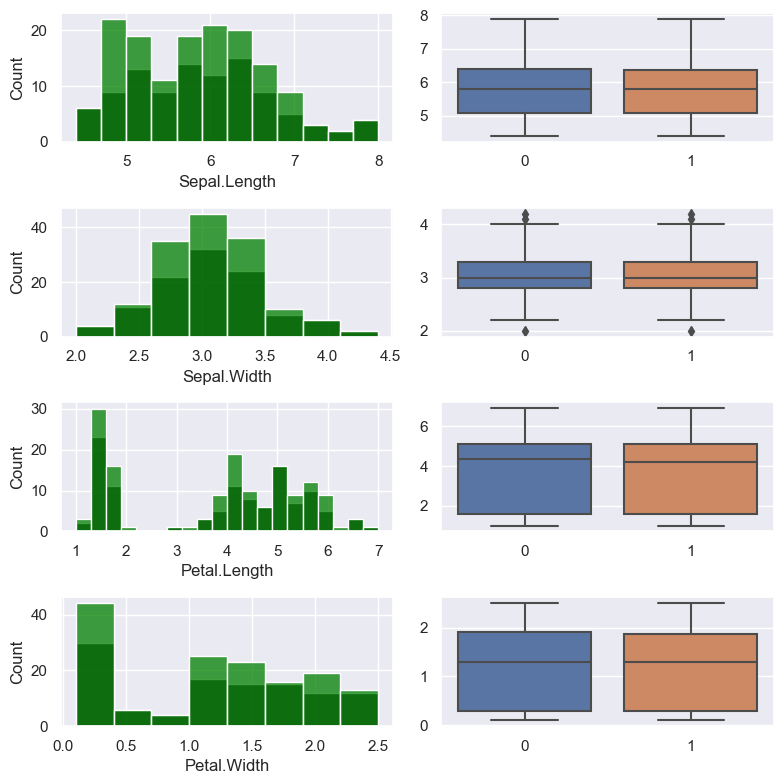

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Sepal.Length", "Sepal.Width","Petal.Length",	"Petal.Width"]):
    a = sns.histplot(data[variable].dropna(), kde = False, ax = axes[index, 0], binwidth = 0.3, color= 'black') #sns.distplot
    b = sns.histplot(data3[variable], kde = False, ax = axes[index, 0] ,binwidth = 0.3, color = 'green')

    c = sns.boxplot(data = [data[variable].values, data3[variable].values],
                ax = axes[index, 1])

plt.tight_layout()

### Nhận xét
#### - Phương pháp hồi quy phù hợp khi thao tác với các trường dữ liệu có sự tương quan lẫn nhau về giá trị.

#### - Với bộ dữ liệu trên các trường được áp dụng hồi quy đều là thông số về kích thước các bộ phận của loài hoa diên vĩ
####  - Ta thấy dù tồn tại ảnh hưởng của môi trường và vòng đời phát triển sinh sống của từng cá thể, tuy nhiên nhìn chung thì đa phần các loài đều có gen giống nhau, hay đa phần các cá thể sẽ có mối tương quan về tỉ lệ kích thước giữa các bộ phận cơ thể.

#### - Nên dùng phương pháp hồi quy để dự đoán các giá trị không đầy đủ cho bộ dữ liệu trên có vẻ khá là hợp lý

## Sử dụng phương pháp phân tích thành phần chính(PCA)

In [ ]:
data4 = data.copy()
data4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,NaN,NaN,1.3,NaN,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,NaN,1.9,virginica
147,6.5,NaN,NaN,NaN,virginica
148,6.2,NaN,5.4,2.3,virginica


In [ ]:
le = LabelEncoder()
data4['Species'] = le.fit_transform(data4.Species)

In [ ]:
data4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,0
1,4.9,3.0,NaN,0.2,0
2,NaN,NaN,1.3,NaN,0
3,4.6,3.1,1.5,NaN,0
4,5.0,NaN,1.4,NaN,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,NaN,1.9,2
147,6.5,NaN,NaN,NaN,2
148,6.2,NaN,5.4,2.3,2


In [ ]:
export_csv = data4.to_csv (r'D:\tknc\btn\data4.csv', index = None, header=True)

## Run on R 4.2.1

In [ ]:
install.packages() - dùng để install thư viện

In [ ]:
print(getwd())
setwd("D:/tknc/pttpc")
print(getwd())

In [ ]:
library(FactoMineR)
library(missMDA)

In [ ]:
#data4 <- read.csv("iris_mv.csv", TRUE, ",")
data4 <- read.csv("data4.csv", TRUE, ",")
head(data4)
str(data4)
data4.acp <- PCA(data4)

In [ ]:
nb_dim <- estim_ncpPCA(data4,ncp.min = 0, ncp.max = 5,method.cv = 'GCV')
#nb_dim <- estim_ncpPCA(data4,ncp.min = 0, ncp.max = 5,method.cv = 'Kfold')
nb_dim

In [ ]:
res.impute <- imputePCA(data4,ncp = 2)
res.impute$completeObs
res.acp <- PCA(res.impute$completeObs)

In [ ]:
write.csv(res.impute$completeObs,"data4_R.csv", row.names = FALSE)

**đây mới là trường hợp khởi tạo dữ liệu theo hướng đơn bội, ngoài ra chúng ta có thể khởi tạo chúng theo hướng đa bội**

In [ ]:
?MIPCA

In [ ]:
data_MIPCA <- MIPCA(data4,ncp = 2,method.mi="Bayes",nboot = 50)

In [ ]:
round(data_boi$res.MI[[2]][1:4],2) #lấy 2 số thập phân sau dấu phẩy

In [ ]:
plot(data_boi,choice = 'var') #val hội tụ,ko thay đổi nhiều

Gộp tất cả các bản này lại và tìm ra mô hình hồi quy cho từng biến, sau đó điền các giá trị khuyết thiếu vào dữ liệu ban đầu bằng các công thức hồi quy đó  

In [ ]:
library(mice)  # thư viện có vai trò như hàm MIPCA, có hàm từ các datafame tạo ra 1 mô hình hồi quy
?mice

In [ ]:
data_mice <- mice(data4, n = 50, defaultMethod = 'norm.boot', printFlag = FALSE)
complete(data_mice,1)

In [ ]:
lm_data_mice <- with(data_mice, lm(Sepal.Length ~ Sepal.Width+Petal.Length+Petal.Width+Species))
# biểu diễn biến 1 bằng 4 biến còn lại

In [ ]:
pool_data_mice <- pool(lm_data_mice)
summary(pool_data_mice)

## Đọc file từ R sang jupyter

In [ ]:
d = pd.read_csv("wines.csv")
d

,alcohol;malic.acid;ash;ash.alkalinity;magnesium;tot..phenols;flavonoids;non.flav..phenols;proanth;col..int.;col..hue;OD.ratio;proline;vintages
0,13.2;1.78;2.14;11.2;100;2.65;2.76;0.26;1.28;4....
1,13.16;2.36;2.67;18.6;101;2.8;3.24;0.3;2.81;5.6...
2,14.37;1.95;2.5;16.8;113;3.85;3.49;0.24;2.18;7....
3,13.24;2.59;2.87;21;118;2.8;2.69;0.39;1.82;4.32...
4,14.2;1.76;2.45;15.2;112;3.27;3.39;0.34;1.97;6....
...,...
172,13.71;5.65;2.45;20.5;95;1.68;0.61;0.52;1.06;7....
173,13.4;3.91;2.48;23;102;1.8;0.75;0.43;1.41;7.3;0...
174,13.27;4.28;2.26;20;120;1.59;0.69;0.43;1.35;10....
175,13.17;2.59;2.37;20;120;1.65;0.68;0.53;1.46;9.3...


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
d.alcohol

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(data4_R.drop(columns="Species")))

PCA()

In [ ]:
summ = {'Standard deviation': np.sqrt(pcs.explained_variance_), 'Proportion of variance': pcs.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)}
pcsSummary_df = pd.DataFrame(summ)
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)
# Giảm số chiều xuống bằng 2, tại PC1 + PC2 = 0.97, chiếm gần như toàn bộ thông tin data

,PC1,PC2,PC3,PC4
Standard deviation,1.7341,0.9655,0.2562,0.1483
Proportion of variance,0.7468,0.2315,0.0163,0.0055
Cumulative proportion,0.7468,0.9782,0.9945,1.0000


In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=data4_R.iloc[:,:4].columns)
pcsComponents_df.iloc[:,:2]
# có thể nhìn thấy index 0,1,3 có dữ liệu chiếm 50% PC1
# có thể nhìn thấy index 2 chiếm 90% PC2

,PC1,PC2
Sepal.Length,0.520940,-0.412273
Sepal.Width,-0.276184,-0.909936
Petal.Length,0.574022,-0.031269
Petal.Width,0.568193,-0.032719


In [ ]:
data_pcs = pd.DataFrame(pcs.transform(preprocessing.scale(data4_R.drop(columns="Species"))),columns = pcsSummary_df.columns).iloc[:,:2]
data_pcs['Species'] = le.inverse_transform(data4_R['Species'])
data_pcs
# data sau khi PCA

,PC1,PC2,Species
0,-2.161104,-0.429928,setosa
1,-1.981305,0.617366,setosa
2,-2.321007,0.107469,setosa
3,-2.300794,0.558225,setosa
4,-2.217636,-0.234364,setosa
...,...,...,...
145,1.914404,-0.453533,virginica
146,1.786388,0.838160,virginica
147,1.962448,0.336255,virginica
148,2.046499,1.073139,virginica


In [ ]:
data4 = data_pcs

 Ngoài các cách thay thế missing values hôm nay mình làm thì còn 1 số phương pháp khác như KNearest Neighbors, EM algprithm